#  4.10: Coding Etiquette & Excel Reporting - Part 1

## Table of content:

## <u>Task 9 -  Produce suitable charts to illustrate your results and export them in your project folder.<u>


### 1) The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

#### a) Busiest hour of each day

### 2) They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

### 3) Instacart has a lot of products with different price tags. Marketing and sales want touse simpler price range groupings to help direct their efforts.

### 4) Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

### 5) The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ.
    
#### a) What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

#### b) Are there differences in ordering habits based on a customer’s loyalty status?

#### c) Are there differences in ordering habits based on a customer’s region?
    
#### d) Is there a connection between age and family status in terms of ordering habits?

#### e) What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?

#### f) What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of.
    
### 6) Export Illustrations

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Import Data Set saved from Task 5

In [2]:
path = r'C:\Users\facun\Desktop\Data Analysis\CF\PYTHON\Instacart Basket Analysis'

In [3]:
df_high_act_customer_dept = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_high_act_customer_dept_Step5.pkl'))

In [4]:
# Check columns names

df_high_act_customer_dept.columns

Index(['order_id', 'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_last_order', 'product_name', 'Age', 'State', 'product_id',
       'n_dependants', 'department_id', 'prices', 'price_range_loc',
       'busiest_day', 'busiest_period_of_day', 'loyalty_flag', 'fam_status',
       'spending_flag', 'order_frequency_flag', 'Gender', 'income', 'Region',
       'age_group', 'income_group', 'department', 'dependants_group',
       'family_type', 'Day', 'Shopper day'],
      dtype='object')

In [5]:
df_high_act_customer_dept.head()

,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_name,Age,State,product_id,n_dependants,...,Gender,income,Region,age_group,income_group,department,dependants_group,family_type,Day,Shopper day
0,2539329,1,2,8,NaN,Soda,31,Alabama,196,3,...,Female,40423,South,Young Adult: 18-35,Low Income,beverages,Parent,Married with children,Monday,Weekday Shopper
1,2254736,4,4,7,29.0,Soda,31,Alabama,196,3,...,Female,40423,South,Young Adult: 18-35,Low Income,beverages,Parent,Married with children,Wednesday,Weekday Shopper
2,431534,5,4,15,28.0,Soda,31,Alabama,196,3,...,Female,40423,South,Young Adult: 18-35,Low Income,beverages,Parent,Married with children,Wednesday,Weekday Shopper
3,3367565,6,2,7,19.0,Soda,31,Alabama,196,3,...,Female,40423,South,Young Adult: 18-35,Low Income,beverages,Parent,Married with children,Monday,Weekday Shopper
4,2295261,9,1,16,0.0,Zero Calorie Cola,31,Alabama,46149,3,...,Female,40423,South,Young Adult: 18-35,Low Income,beverages,Parent,Married with children,Sunday,Weekend Shopper


In [6]:
df_high_act_customer_dept.shape

(9291228, 29)

## 1) The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

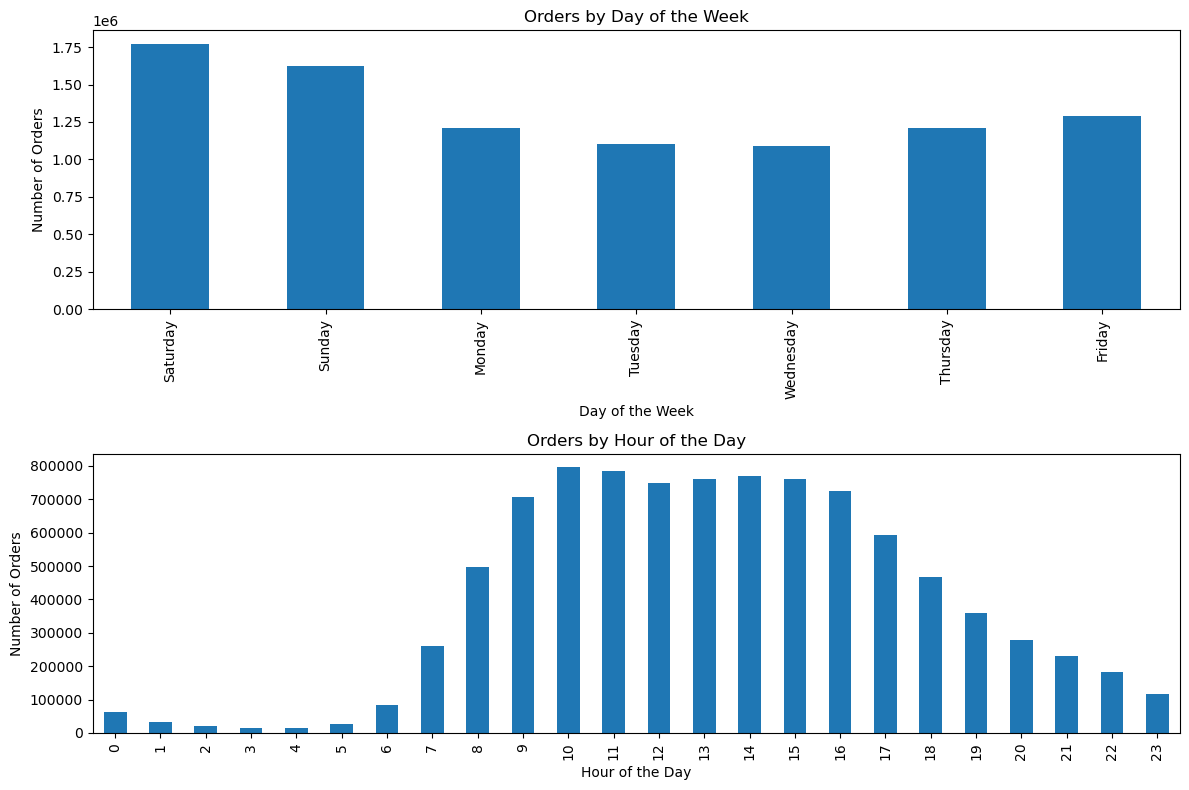

In [120]:
# Create a Series with the counts of each day of the week

day_of_week_counts = df_high_act_customer_dept['orders_day_of_week'].value_counts()
hour_of_day_counts = df_high_act_customer_dept['order_hour_of_day'].value_counts()

# Sort the values by day of the week (0 to 6, where 0 is Saturday and 6 is Friday)
day_of_week_counts = day_of_week_counts.sort_index()

# Sort the values by hour of the day (0 to 23)
hour_of_day_counts = hour_of_day_counts.sort_index()

# Create a figure with two subplots
plt.figure(figsize=(12, 8))

# First subplot (top)
plt.subplot(2, 1, 1)
day_of_week_counts.plot(kind='bar')
plt.title('Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

# Second subplot (bottom)
plt.subplot(2, 1, 2)
hour_of_day_counts.plot(kind='bar')
plt.title('Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')



# Adjust spacing between subplots
plt.tight_layout()

# Export
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'busiest_days_bars.png'))

# Show the plot
plt.show()

### a) Busiest hour of each day

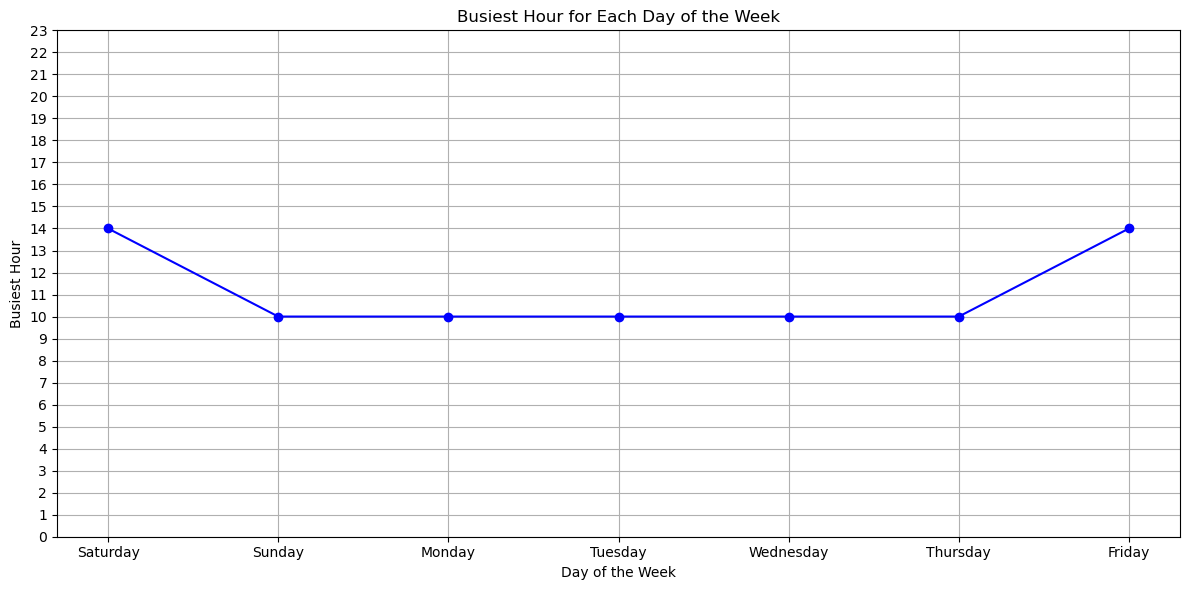

In [161]:
# Create a DataFrame to hold the counts of orders by day and hour
day_hour_counts = df_high_act_customer_dept.groupby(['orders_day_of_week', 'order_hour_of_day']).size().unstack()

# Find the busiest hour for each day
busiest_hour_each_day = day_hour_counts.idxmax(axis=1)

# Create a figure and axis for the plot
plt.figure(figsize=(12, 6))

# Plot the busiest hour for each day
plt.plot(busiest_hour_each_day.index, busiest_hour_each_day.values, marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Busiest Hour for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Busiest Hour')
plt.xticks(busiest_hour_each_day.index)
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.yticks(range(0, 24))  # Display every hour in a 24-hour format on the y-axis

# Export
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'busiest_days_line.png'))

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


## 2) They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

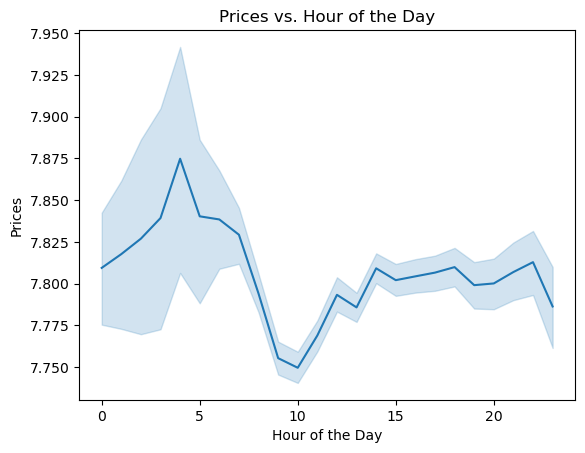

In [123]:
line = sns.lineplot(data = df_high_act_customer_dept, x = 'order_hour_of_day',y = 'prices')

plt.title('Prices vs. Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Prices')

# Export
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_vs_hours_of_day_line.png'))

# Show the plot
plt.show()

## 3) Instacart has a lot of products with different price tags. Marketing and sales want touse simpler price range groupings to help direct their efforts.

In [10]:
df_high_act_customer_dept['price_range_loc'].value_counts()

Low-range product     2902214
Mid-range product      217745
High-range product     119423
Name: price_range_loc, dtype: int64

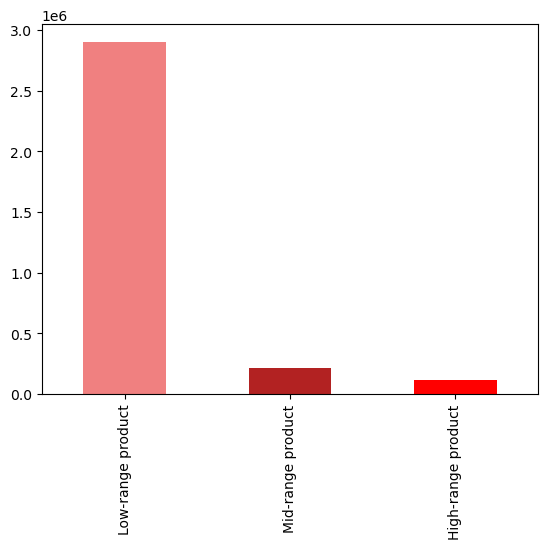

In [124]:
price_range_distribution_bar = df_high_act_customer_dept['price_range_loc'].value_counts().plot.bar(color = ['lightcoral', 'firebrick', 'red'])

In [125]:
# Export

price_range_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_distribution_bar.png'))

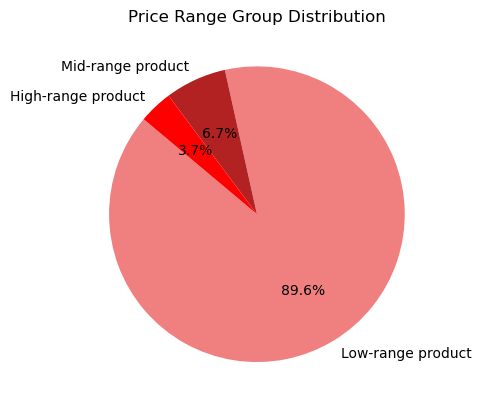

In [126]:
# Data
data = df_high_act_customer_dept['price_range_loc'].value_counts()
labels = data.index
sizes = data.values

# Create a pie chart
plt.pie(sizes, labels = labels, colors = ['lightcoral', 'firebrick', 'red'],autopct='%1.1f%%', startangle=140)


# Add a title
plt.title('Price Range Group Distribution')

# Export
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_group_distribution_pie%.png'))

# Display the chart
plt.show()

## 4) Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

Text(0, 0.5, 'Departments')

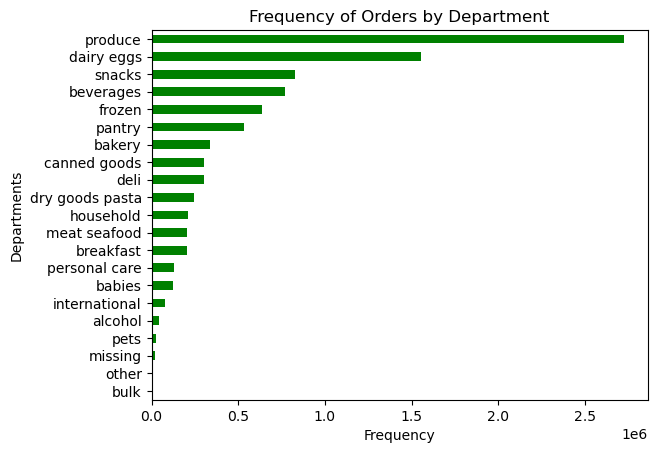

In [13]:
cmap = plt.cm.get_cmap('viridis')

bar_dept = df_high_act_customer_dept['department'].value_counts().sort_values(ascending=True).plot.barh( title = 'Frequency of Orders by Department', color = 'green')

plt.xlabel('Frequency')
plt.ylabel('Departments')

In [127]:
#Export

frequency_dpt_bar = bar_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'frequency_dpt_bar.png'))

## 5) The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ.

### a) What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

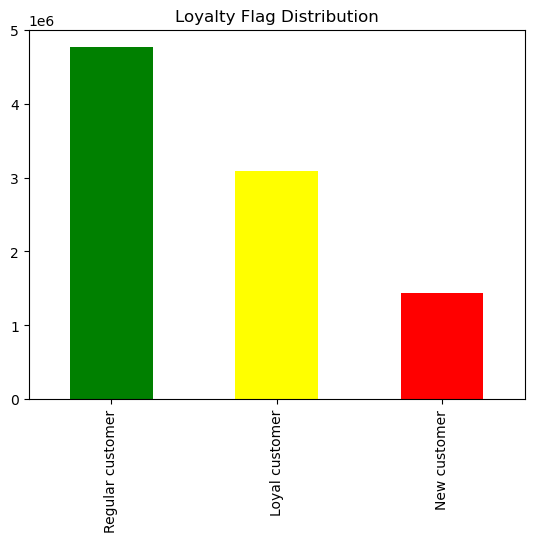

In [14]:
customer_counts_by_loyalty_flag = df_high_act_customer_dept['loyalty_flag'].value_counts().plot.bar( title = 'Loyalty Flag Distribution', color = ['green','yellow', 'red'])

In [128]:
#Export

customer_counts_by_loyalty_flag_bar = customer_counts_by_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_counts_by_loyalty_flag_bar.png'))

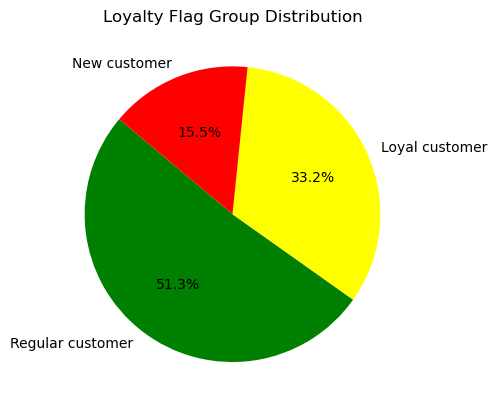

In [129]:
# Data
data2 = df_high_act_customer_dept['loyalty_flag'].value_counts()
labels2 = data2.index
sizes2 = data2.values

# Create a pie chart
plt.pie(sizes2, labels = labels2, colors = ['green', 'yellow', 'red'],autopct='%1.1f%%', startangle=140)


# Add a title
plt.title('Loyalty Flag Group Distribution')

# Export
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_counts_by_loyalty_flag_distribution_pie%.png'))

# Display the chart
plt.show()

### b) Are there differences in ordering habits based on a customer’s loyalty status?

#### Checking loyalty group customers departamental ordering habits 

In [16]:
dept_loyalty = pd.crosstab(df_high_act_customer_dept['department'], df_high_act_customer_dept['loyalty_flag'], dropna=False)
dept_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,11553,8575,23116
babies,50348,13908,59260
bakery,113795,51760,170370
beverages,256596,119189,395777
breakfast,66858,32007,103507
bulk,4102,1224,4681
canned goods,88347,53929,161947
dairy eggs,548357,225150,778829
deli,97156,47376,156724


Text(0.5, 0, 'Ordering Frequency')

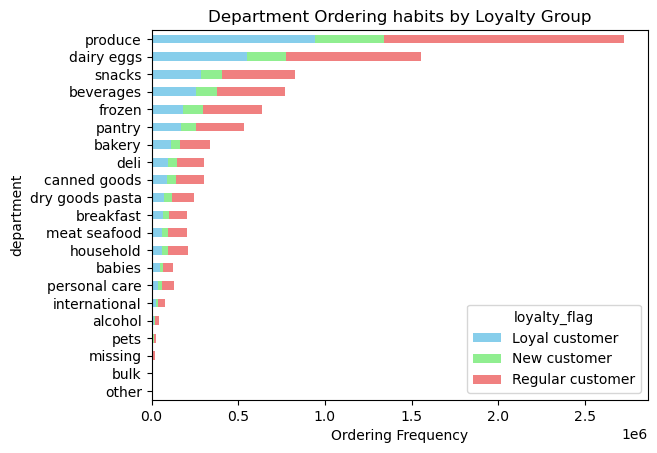

In [17]:
dept_loyalty_stacked_bar = dept_loyalty.sort_values(by=['Loyal customer'], ascending=True).plot.barh(color = ['skyblue','lightgreen','lightcoral'], stacked = True)
plt.title("Department Ordering habits by Loyalty Group")
plt.xlabel('Ordering Frequency')

In [131]:
#Export

dept_loyalty_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_loyalty_stacked_bar.png'))

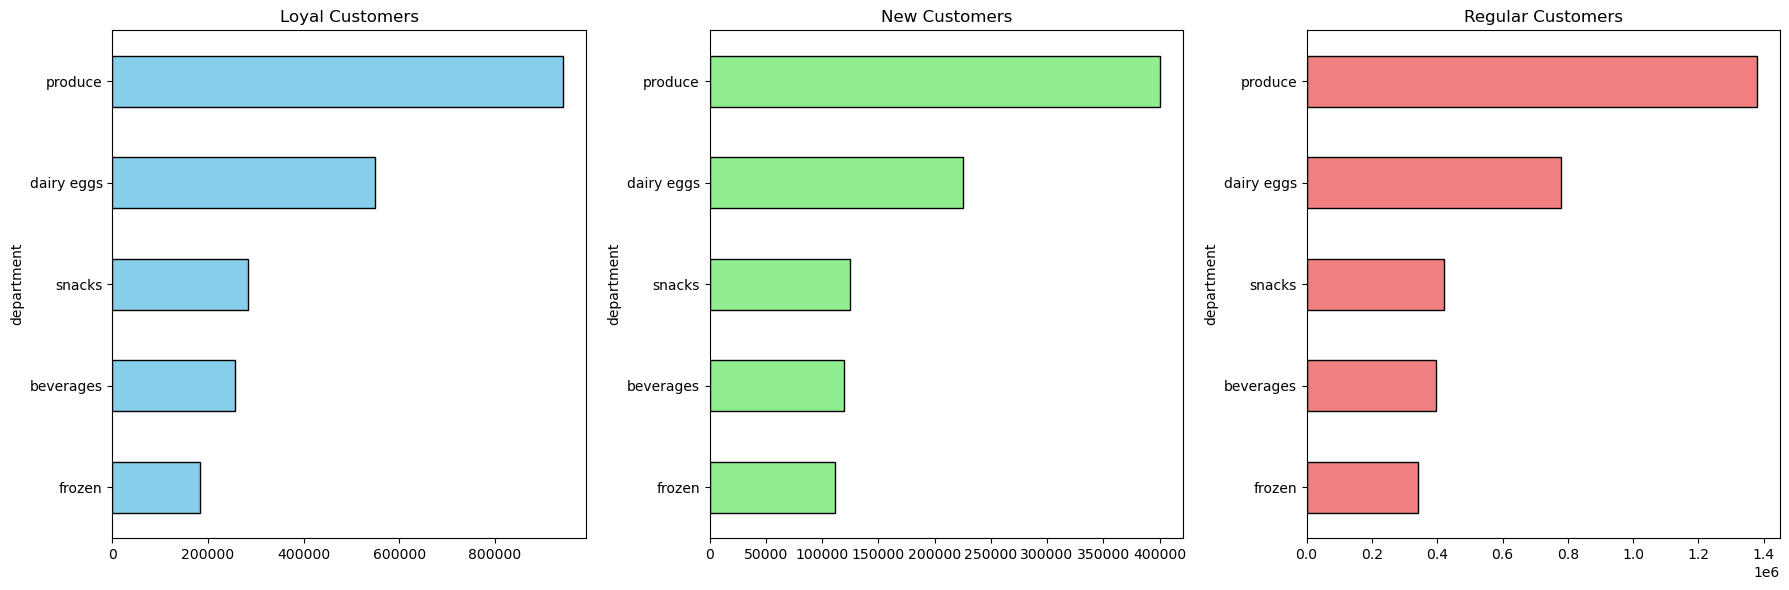

In [132]:
# Create a figure and a 1x3 subplot (1 row, 3 columns)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot top 5 for Loyal Customers
top_5_loyal = dept_loyalty.sort_values(by='Loyal customer', ascending=False).head(5)
top_5_loyal['Loyal customer'].plot(kind='barh', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Loyal Customers')
axes[0].invert_yaxis()  # highest count at the top

# Plot top 5 for New Customers
top_5_new = dept_loyalty.sort_values(by='New customer', ascending=False).head(5)
top_5_new['New customer'].plot(kind='barh', ax=axes[1], color='lightgreen', edgecolor='black')
axes[1].set_title('New Customers')
axes[1].invert_yaxis()

# Plot top 5 for Regular Customers
top_5_regular = dept_loyalty.sort_values(by='Regular customer', ascending=False).head(5)
top_5_regular['Regular customer'].plot(kind='barh', ax=axes[2], color='lightcoral', edgecolor='black')
axes[2].set_title('Regular Customers')
axes[2].invert_yaxis()

# Export
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_loyalty_individual_bar.png'))

plt.tight_layout()  # To ensure the plots don't overlap
plt.show()


#### Checking loyalty group customers by Days of the week ordering habits

In [19]:
dow_loyalty = pd.crosstab(df_high_act_customer_dept['orders_day_of_week'], df_high_act_customer_dept['loyalty_flag'], dropna=False)
dow_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
orders_day_of_week,,,
0,526276,294838,952373
1,552618,245795,825066
2,405194,187615,614090
3,379680,168060,554056
4,387667,161097,539811
5,436995,176354,596117
6,394767,207904,684855


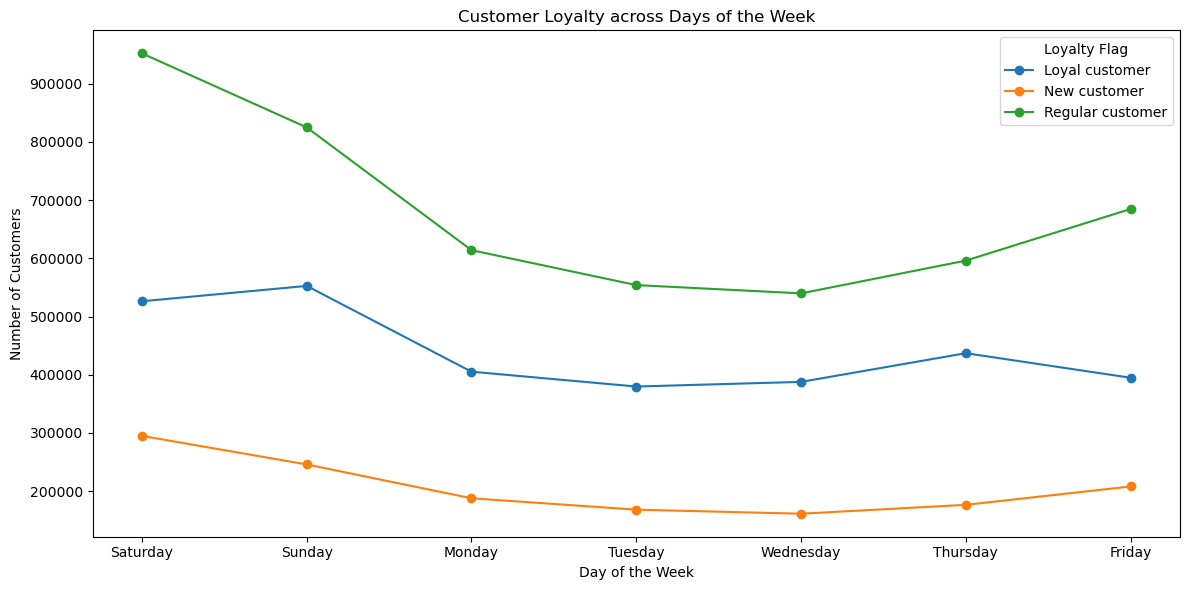

In [20]:

# Plot
dow_loyalty_linechart = dow_loyalty.plot(figsize=(12,6), marker='o', linestyle='-', linewidth=1.5)
plt.title('Customer Loyalty across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.legend(title='Loyalty Flag')
plt.tight_layout()

plt.show()

In [133]:
#Export

dow_loyalty_linechart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dow_loyalty_linechart.png'))

#### Checking loyalty group customers average paid price by days of the week ordering habits

In [21]:
average_spent_per_day_loyalty = df_high_act_customer_dept.groupby(['loyalty_flag', 'orders_day_of_week'])['prices'].mean().reset_index()
average_spent_per_day_loyalty

,loyalty_flag,orders_day_of_week,prices
0,Loyal customer,0,7.871894
1,Loyal customer,1,7.722385
2,Loyal customer,2,7.747076
3,Loyal customer,3,7.754983
4,Loyal customer,4,7.748426
5,Loyal customer,5,7.727038
6,Loyal customer,6,7.863264
7,New customer,0,7.843153
8,New customer,1,7.793725
9,New customer,2,7.753576


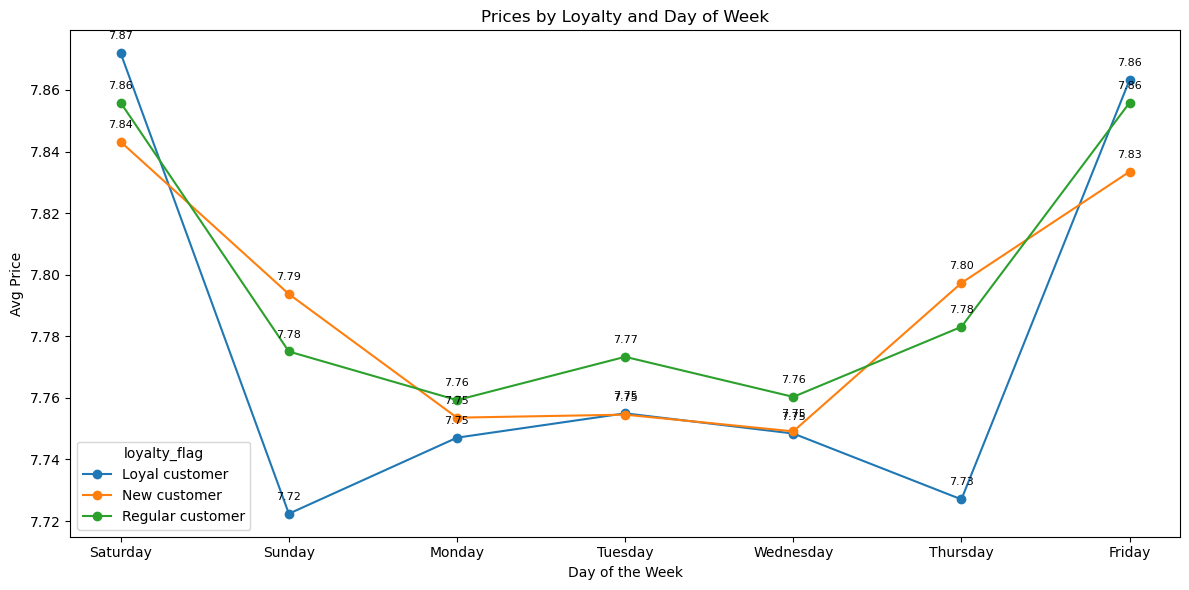

In [137]:
# Pivot the data to make plotting easier
pivot_data2 = average_spent_per_day_loyalty.pivot(index='orders_day_of_week', columns='loyalty_flag', values='prices')

# Visualizing the data
dow_avrprice_loyalty = pivot_data2.plot(figsize=(12,6), marker='o', linestyle='-', linewidth=1.5)
plt.title("Prices by Loyalty and Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Avg Price")
plt.xticks(range(7), ['Saturday','Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

# Annotating the dots with their values
for col in pivot_data2.columns:
    for x, y in enumerate(pivot_data2[col]):
        dow_avrprice_loyalty.annotate(f"{y:.2f}", (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# Export
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dow_avrprice_loyalty_linechart.png'))        
        
plt.tight_layout()
plt.show()

### c) Are there differences in ordering habits based on a customer’s region?

In [23]:
dept_region = pd.crosstab(df_high_act_customer_dept['department'], df_high_act_customer_dept['Region'], dropna=False)
dept_region

Region,Midwest,Northeast,South,West
department,,,,
alcohol,10189,7584,14494,10977
babies,28666,21923,41951,30976
bakery,78378,60156,111358,86033
beverages,179714,139136,257418,195294
breakfast,47236,35325,67319,52492
bulk,2381,1665,3406,2555
canned goods,71127,53159,101488,78449
dairy eggs,362960,274001,516820,398555
deli,70584,53418,100133,77121


Text(0.5, 0, 'Ordering Frequency')

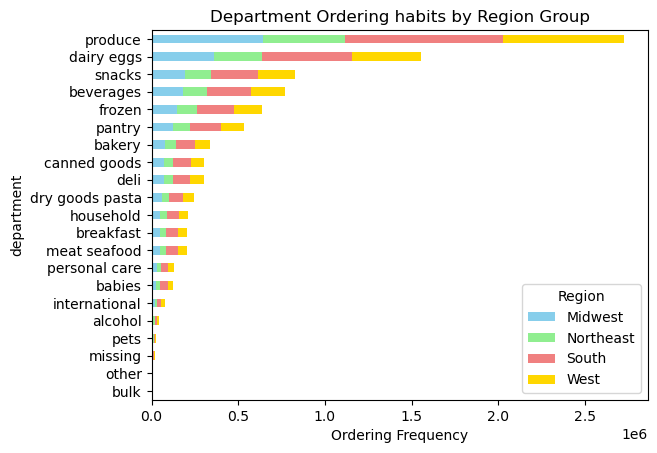

In [24]:
dept_region_stacked_bar = dept_region.sort_values(by=['South'], ascending=True).plot.barh(color = ['skyblue','lightgreen','lightcoral', 'gold'], stacked = True)
plt.title("Department Ordering habits by Region Group")
plt.xlabel('Ordering Frequency')

In [138]:
#Export

dept_region_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_region_stacked_bar.png'))

#### Checking loyalty group customers by Days of the week ordering habits


In [25]:
dow_region = pd.crosstab(df_high_act_customer_dept['orders_day_of_week'], df_high_act_customer_dept['Region'], dropna=False)
dow_region

Region,Midwest,Northeast,South,West
orders_day_of_week,,,,
0,417247,312954,586981,456305
1,379353,286099,542023,416004
2,283667,213717,401907,307608
3,257222,194297,368866,281411
4,255533,191646,362555,278841
5,282691,214886,402457,309432
6,303110,225057,428736,330623


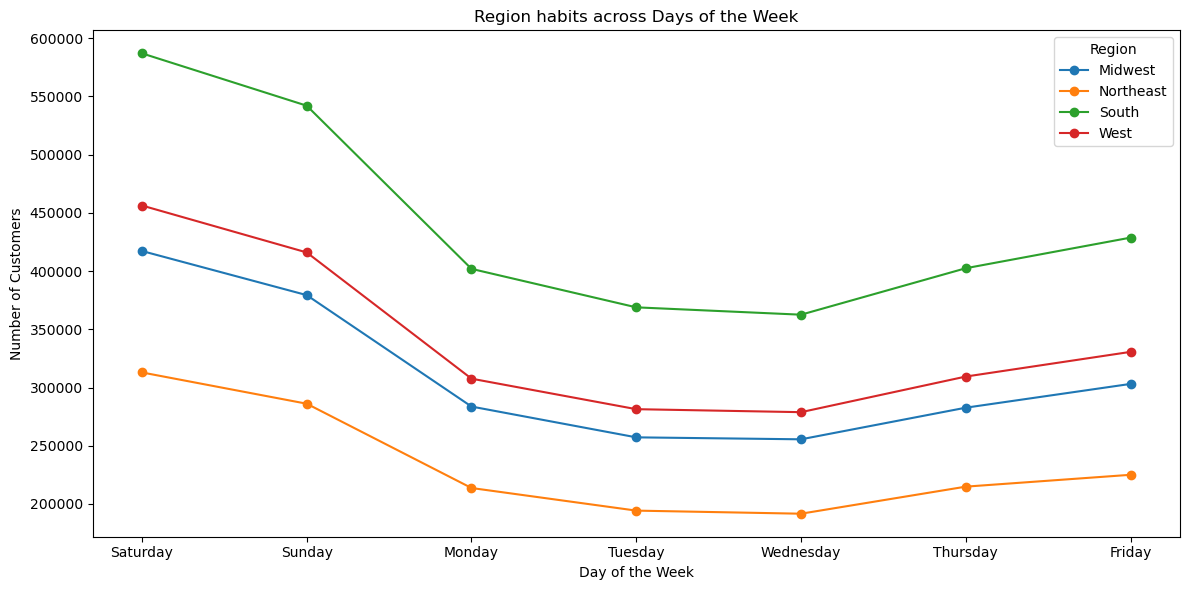

In [139]:

# Plot
dow_region_linechart = dow_region.plot(figsize=(12,6), marker='o', linestyle='-', linewidth=1.5)
plt.title('Region habits across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.legend(title='Region')
plt.tight_layout()

# Export
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dow_region_linechart.png'))   

plt.show()

#### Checking average paid price by days of the week ordering habits by region

In [27]:
average_spent_per_day_region = df_high_act_customer_dept.groupby(['Region', 'orders_day_of_week'])['prices'].mean().reset_index()
average_spent_per_day_region

,Region,orders_day_of_week,prices
0,Midwest,0,7.860866
1,Midwest,1,7.762222
2,Midwest,2,7.759000
3,Midwest,3,7.760577
4,Midwest,4,7.750597
5,Midwest,5,7.760260
6,Midwest,6,7.850125
7,Northeast,0,7.840042
8,Northeast,1,7.758802
9,Northeast,2,7.737828


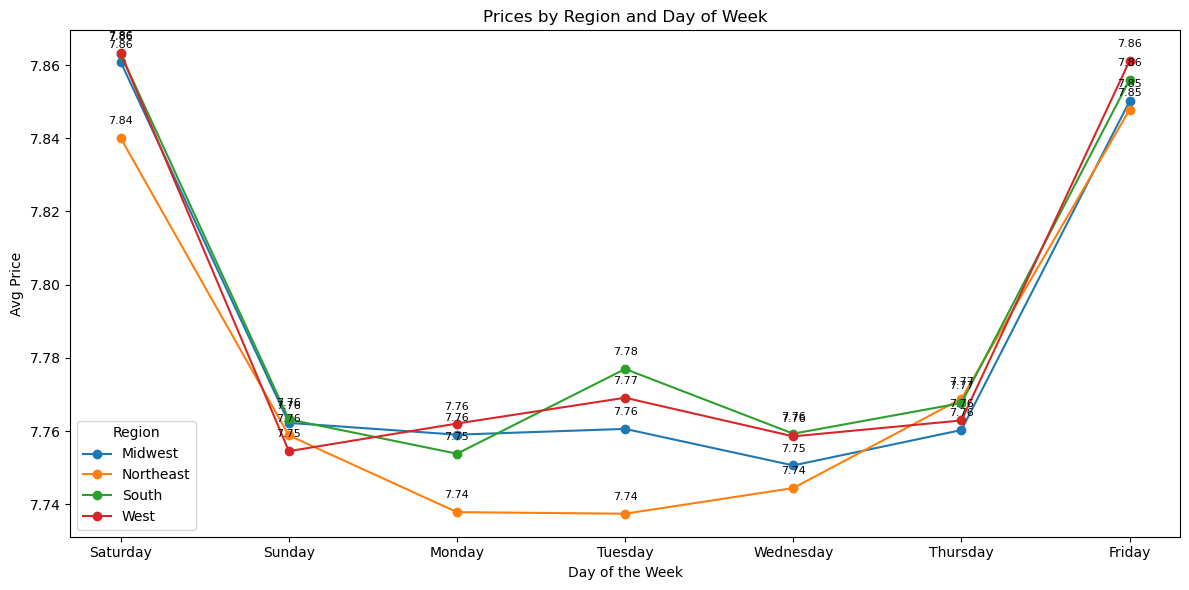

In [140]:
# Pivot the data to make plotting easier
pivot_data3 = average_spent_per_day_region.pivot(index='orders_day_of_week', columns='Region', values='prices')

# Visualizing the data
dow_avrprice_region = pivot_data3.plot(figsize=(12,6), marker='o', linestyle='-', linewidth=1.5)
plt.title("Prices by Region and Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Avg Price")
plt.xticks(range(7), ['Saturday','Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

# Annotating the dots with their values
for col in pivot_data3.columns:
    for x, y in enumerate(pivot_data3[col]):
        dow_avrprice_region.annotate(f"{y:.2f}", (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# Export
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dow_avrprice_region_linechart.png'))        
        
plt.tight_layout()
plt.show()

### d) Is there a connection between age and family status in terms of ordering habits?

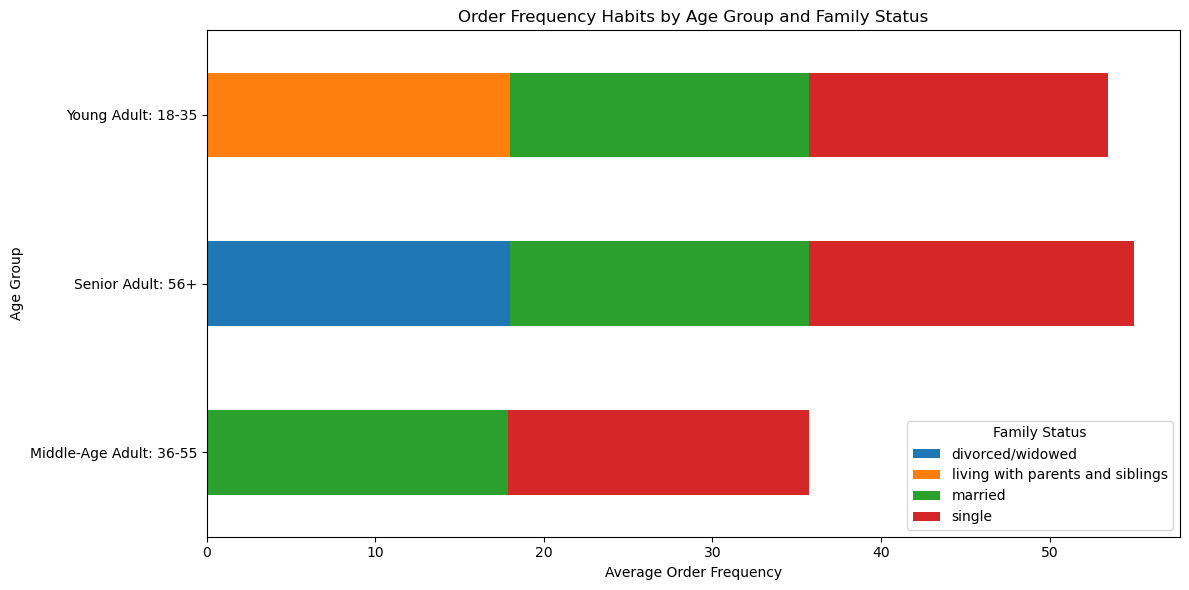

In [141]:
pivot_data4 = df_high_act_customer_dept.pivot_table(index='age_group', columns='fam_status', values='order_number', aggfunc='mean')

# Plotting the horizontal stacked bar chart
pivot_data4.plot(kind='barh', stacked=True, figsize=(12, 6))

plt.title('Order Frequency Habits by Age Group and Family Status')
plt.xlabel('Average Order Frequency')
plt.ylabel('Age Group')
plt.legend(title='Family Status', loc='lower right')
plt.tight_layout()

# Export
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_habits_by_age_group_family_status_stackedhbar.png'))

plt.show()

#### Checking Order Counts by Age Group and Family Status across Grocery Departments

In [30]:
# Create a pivot table
age_famstatus_dept = df_high_act_customer_dept.pivot_table(index=['age_group', 'fam_status'], columns='department', values='order_number', aggfunc='sum').fillna(0)

age_famstatus_dept

department                                                alcohol  babies  \
age_group               fam_status                                          
Middle-Age Adult: 36-55 married                            151099  615847   
                        single                              69157  205552   
Senior Adult: 56+       divorced/widowed                    58079  206599   
                        married                            188706  712226   
                        single                              14485   46943   
Young Adult: 18-35      living with parents and siblings    40192  110833   
                        married                            119113  390027   
                        single                              51746  168750   

department                                                 bakery  beverages  \
age_group               fam_status                                             
Middle-Age Adult: 36-55 married                           1408916    3211386   
                        single                             459799    1090846   
Senior Adult: 56+       divorced/widowed                   505510    1206718   
                        married                           1820262    4235792   
                        single                             101208     223772   
Young Adult: 18-35      living with parents and siblings   287996     624833   
                        married                            969756    2239026   
                        single                             427739     975983   

department                                                breakfast   bulk  \
age_group               fam_status                                           
Middle-Age Adult: 36-55 married                              848474  49518   
                        single                               277710  15494   
Senior Adult: 56+       divorced/widowed                     305627  16879   
                        married                             1042270  63214   
                        single                                59627   2971   
Young Adult: 18-35      living with parents and siblings     178278  10656   
                        married                              588701  35883   
                        single                               245574  12813   

department                                                canned goods  \
age_group               fam_status                                       
Middle-Age Adult: 36-55 married                                1215137   
                        single                                  409018   
Senior Adult: 56+       divorced/widowed                        435921   
                        married                                1539025   
                        single                                   95507   
Young Adult: 18-35      living with parents and siblings        251851   
                        married                                 843397   
                        single                                  365075   

department                                                dairy eggs     deli  \
age_group               fam_status                                              
Middle-Age Adult: 36-55 married                              6746333  1204750   
                        single                               2213111   400564   
Senior Adult: 56+       divorced/widowed                     2435511   450534   
                        married                              8465374  1548019   
                        single                                506117    91042   
Young Adult: 18-35      living with parents and siblings     1393625   252663   
                        married                              4687761   854770   
                        single                               2005706   364922   

department                                                dry goods pasta  \
age_group         

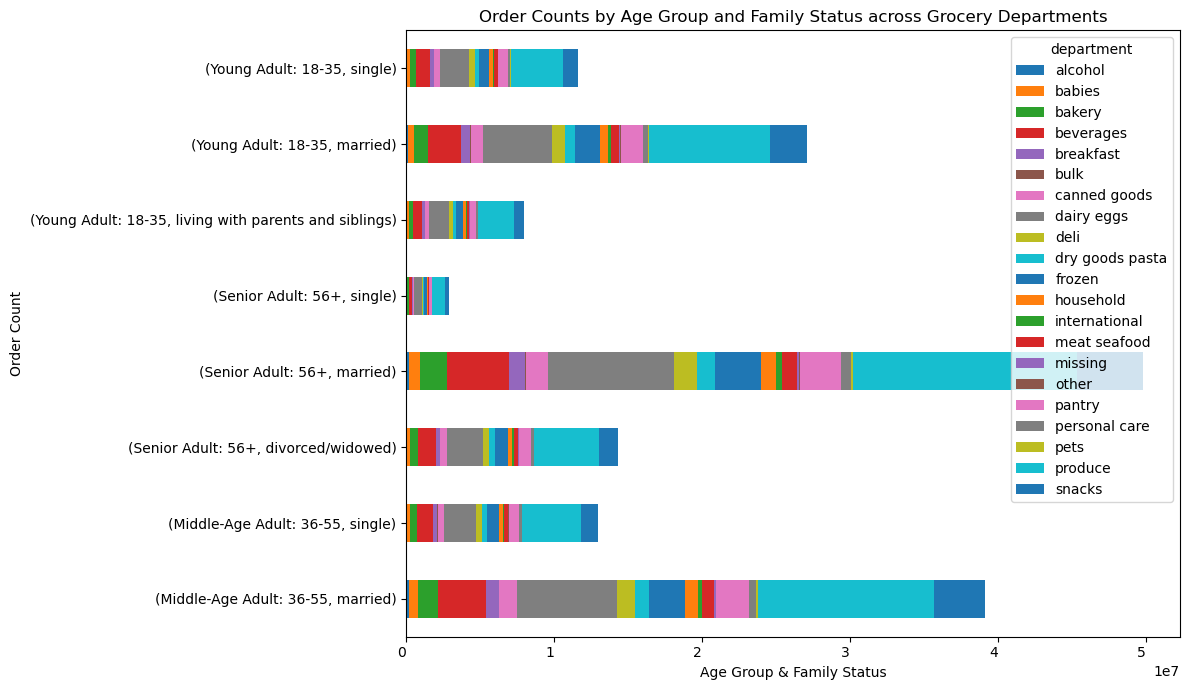

In [142]:
age_famstatus_dept_stackedbar = age_famstatus_dept.plot(kind='barh', stacked=True, figsize=(12, 7))

# Customizing the graph
plt.title('Order Counts by Age Group and Family Status across Grocery Departments')
plt.ylabel('Order Count')
plt.xlabel('Age Group & Family Status')
plt.xticks(ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Adjust the layout for better display

# Export
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_famstatus_dept_stackedbar.png'))

plt.show()

### e) What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?

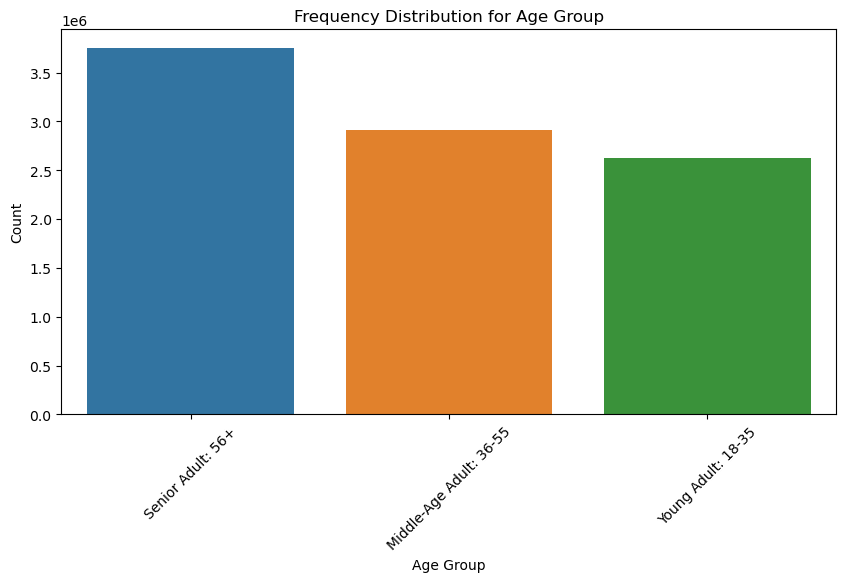

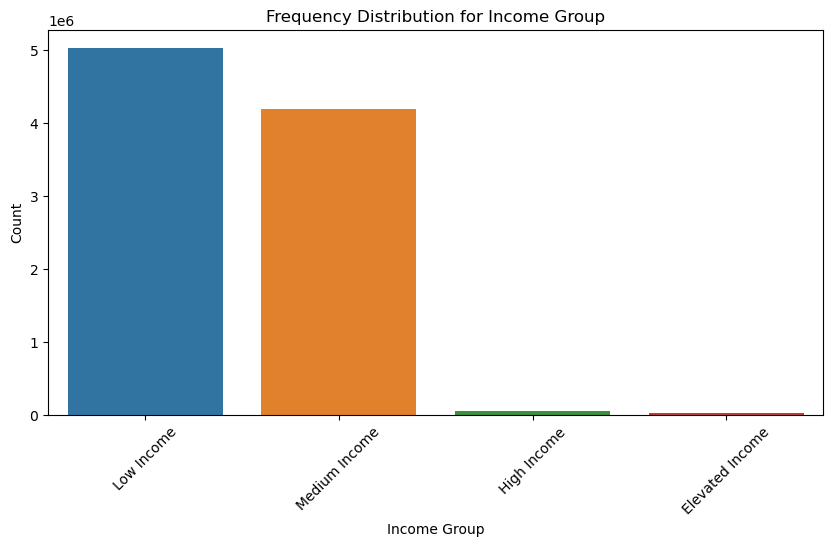

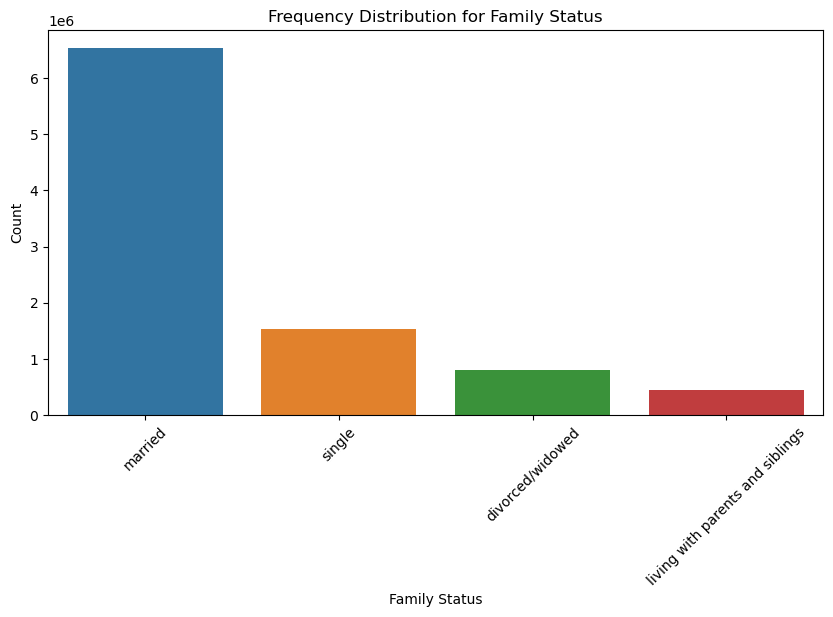

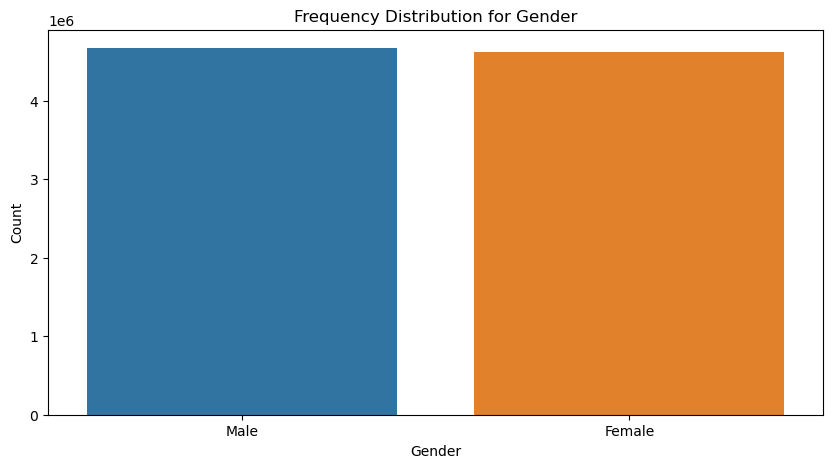

In [146]:
# Frequency distribution tables
age_group_freq = df_high_act_customer_dept['age_group'].value_counts()
income_group_freq = df_high_act_customer_dept['income_group'].value_counts()
family_status_freq = df_high_act_customer_dept['fam_status'].value_counts()
gender_freq = df_high_act_customer_dept['Gender'].value_counts()


# Visualizing the distributions

# Age Group Distribution
plt.figure(figsize=(10,5))
sns.barplot(x=age_group_freq.index, y=age_group_freq.values)
plt.title("Frequency Distribution for Age Group")
plt.ylabel("Count")
plt.xlabel("Age Group")
plt.xticks(rotation=45)

# Export
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_order_frequencybar.png'))

plt.show()


# Income Group Distribution
plt.figure(figsize=(10,5))
sns.barplot(x=income_group_freq.index, y=income_group_freq.values)
plt.title("Frequency Distribution for Income Group")
plt.ylabel("Count")
plt.xlabel("Income Group")
plt.xticks(rotation=45)

# Export
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_order_frequencybar.png'))

plt.show()

# Family Status Distribution
plt.figure(figsize=(10,5))
sns.barplot(x=family_status_freq.index, y=family_status_freq.values)
plt.title("Frequency Distribution for Family Status")
plt.ylabel("Count")
plt.xlabel("Family Status")
plt.xticks(rotation=45)

# Export
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_status_order_frequencybar.png'))

plt.show()


# Gender Distribution
plt.figure(figsize=(10,5))
sns.barplot(x=gender_freq.index, y=gender_freq.values)
plt.title("Frequency Distribution for Gender")
plt.ylabel("Count")
plt.xlabel("Gender")

# Export
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'gender_order_frequencybar.png'))

plt.show()


In [44]:
# Displaying the tables

agg_age_group = df_high_act_customer_dept.groupby('age_group').agg({'order_number': ['min', 'mean', 'max'],
    'prices': ['min', 'mean', 'max']}).reset_index()

agg_age_group

age_group order_number                prices                
                                    min       mean max    min      mean   max
0  Middle-Age Adult: 36-55            1  17.854517  99    1.0  7.790985  25.0
1        Senior Adult: 56+            1  17.837712  99    1.0  7.795456  25.0
2       Young Adult: 18-35            1  17.790672  99    1.0  7.786865  25.0

In [41]:
agg_income_group = df_high_act_customer_dept.groupby('income_group').agg({'order_number': ['min', 'mean', 'max'],
    'prices': ['min', 'mean', 'max']}).reset_index()

agg_income_group

income_group order_number                prices                
                            min       mean max    min      mean   max
0  Elevated Income            1  20.222564  99    1.0  7.732943  25.0
1      High Income            1  19.955075  99    1.0  7.797796  25.0
2       Low Income            1  17.757649  99    1.0  7.654993  25.0
3    Medium Income            1  17.875326  99    1.0  7.956014  25.0

In [42]:
agg_fam_status = df_high_act_customer_dept.groupby('fam_status').agg({'order_number': ['min', 'mean', 'max'],
    'prices': ['min', 'mean', 'max']}).reset_index()

agg_fam_status

fam_status order_number                prices  \
                                             min       mean max    min   
0                  divorced/widowed            1  17.995575  99    1.0   
1  living with parents and siblings            1  17.968099  99    1.0   
2                           married            1  17.771925  99    1.0   
3                            single            1  17.950147  99    1.0   

                   
       mean   max  
0  7.804016  25.0  
1  7.808036  25.0  
2  7.790375  25.0  
3  7.785786  25.0

In [43]:
agg_gender = df_high_act_customer_dept.groupby('Gender').agg({'order_number': ['min', 'mean', 'max'],
    'prices': ['min', 'mean', 'max']}).reset_index()

agg_gender

Gender order_number                prices                
                   min       mean max    min      mean   max
0  Female            1  17.897304  99    1.0  7.786572  25.0
1    Male            1  17.762953  99    1.0  7.796625  25.0

### f) What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of.

In [55]:
dow_fam_type = pd.crosstab(df_high_act_customer_dept['orders_day_of_week'], df_high_act_customer_dept['family_type'], dropna=False)
dow_fam_type

family_type,Married with children,Single without children,divorced/widowed without children,living with parents and siblings with children
orders_day_of_week,,,,
0,1246131,292397,150951,84008
1,1136926,271140,137598,77815
2,848364,197614,103548,57373
3,774668,180442,94349,52337
4,764900,179260,92214,52201
5,847036,199530,104494,58406
6,907326,207615,110919,61666


#### Average numbers of orders by family type

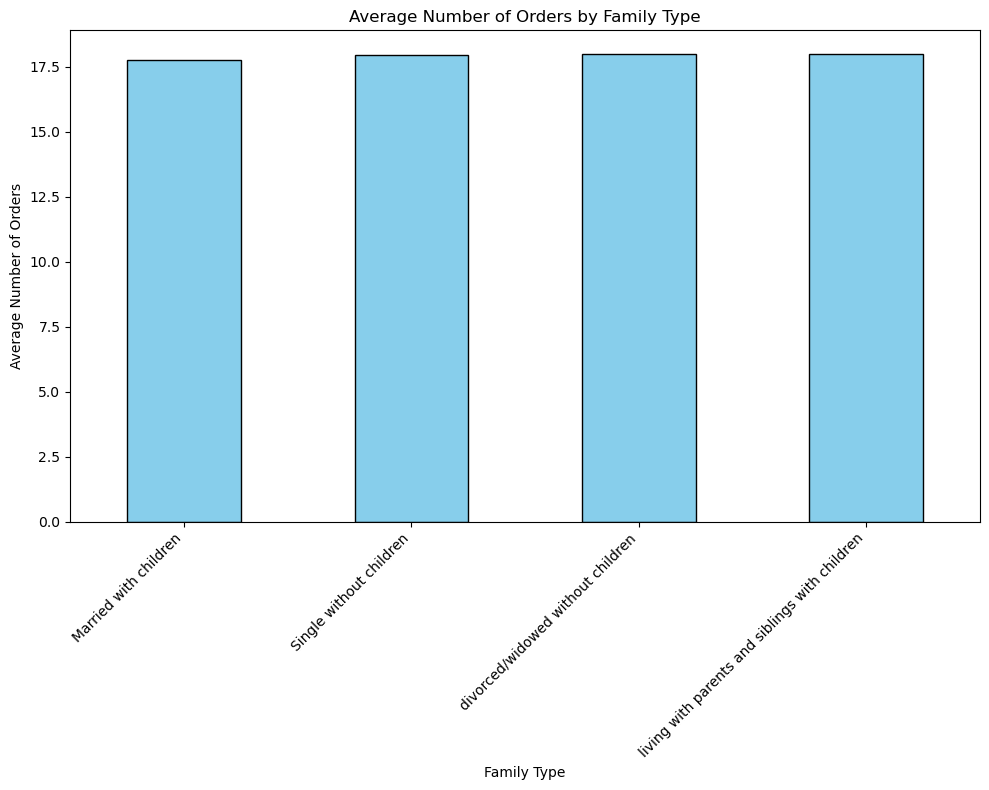

In [147]:
# Group by customer profile and compute the average
fam_type_avg_orders = df_high_act_customer_dept.groupby('family_type')['order_number'].mean()

# Plotting
plt.figure(figsize=(10, 8))
fam_type_avg_orders.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Number of Orders by Family Type")
plt.ylabel("Average Number of Orders")
plt.xlabel("Family Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Export
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'avr_num_ord_fam_type_bar.png'))

plt.show()

In [65]:
fam_type_avg_orders

family_type
Married with children                             17.771925
Single without children                           17.950147
divorced/widowed without children                 17.995575
living with parents and siblings with children    17.968099
Name: order_number, dtype: float64

#### Average number of orders by income group

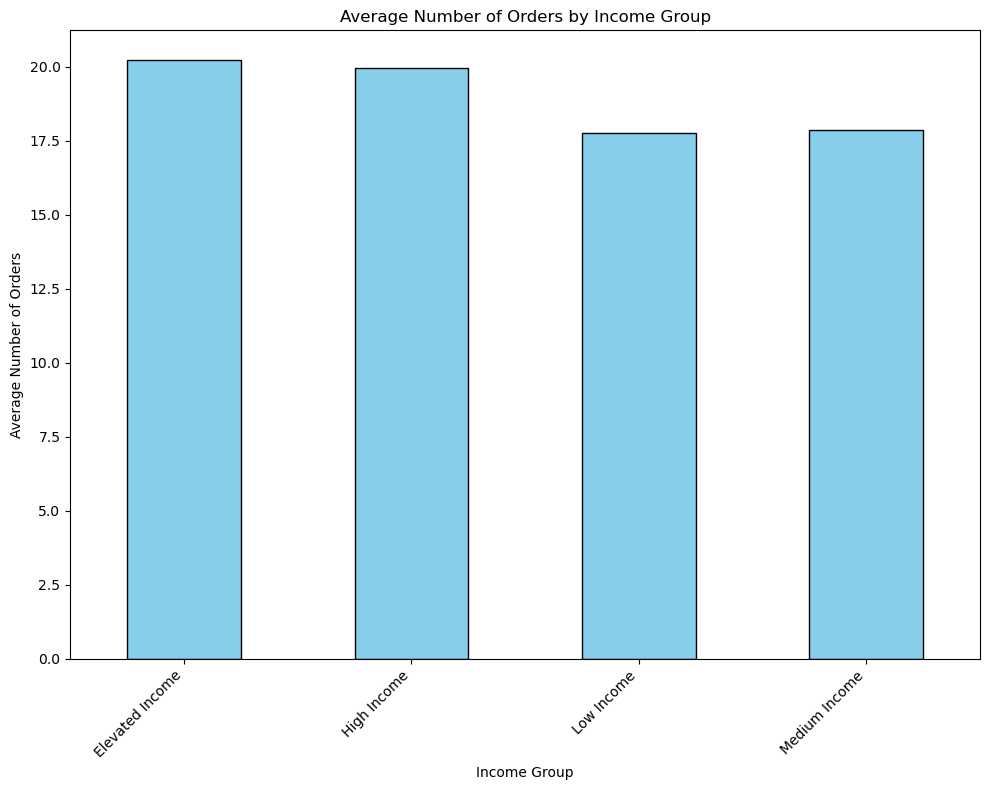

In [148]:
# Group by customer profile and compute the average
income_group_avg_orders = df_high_act_customer_dept.groupby('income_group')['order_number'].mean()

# Plotting
plt.figure(figsize=(10, 8))
income_group_avg_orders.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Number of Orders by Income Group")
plt.ylabel("Average Number of Orders")
plt.xlabel("Income Group")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Export
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'avr_num_ord_income_group_bar.png'))

plt.show()

In [77]:
income_group_avg_orders

income_group
Elevated Income    20.222564
High Income        19.955075
Low Income         17.757649
Medium Income      17.875326
Name: order_number, dtype: float64

#### Average number of orders by Income Group by Family Type

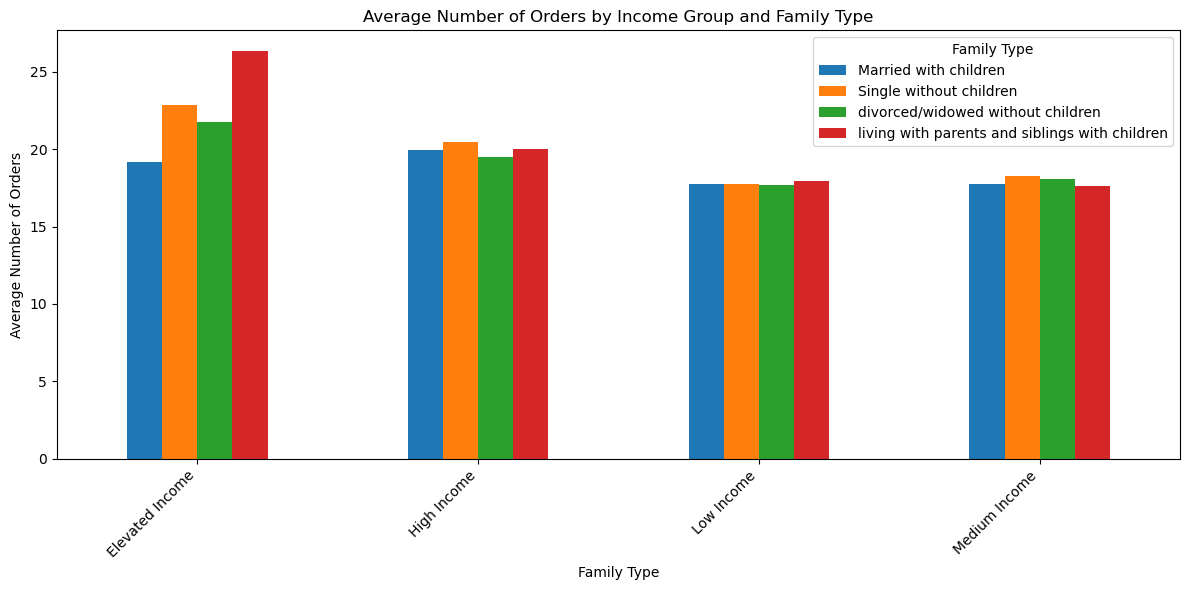

In [149]:
# Create a crosstab between income_group and family_type computing the average order number
avg_orders_crosstab = pd.crosstab(df_high_act_customer_dept['income_group'], 
                                  df_high_act_customer_dept['family_type'], 
                                  values=df_high_act_customer_dept['order_number'], 
                                  aggfunc='mean')

# Plotting the results using a bar chart
avg_orders_crosstab.plot(kind='bar', figsize=(12,6))
plt.title("Average Number of Orders by Income Group and Family Type")
plt.ylabel("Average Number of Orders")
plt.xlabel("Family Type")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Family Type")
plt.tight_layout()

# Export
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'avr_num_ord_by_fam_type_&_income_group_bar.png'))

plt.show()

In [86]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: black; color: white' if v else '' for v in is_max]

styled = avg_orders_crosstab.style.apply(highlight_max, axis=0)
styled

family_type,Married with children,Single without children,divorced/widowed without children,living with parents and siblings with children
income_group,,,,
Elevated Income,19.156828,22.834976,21.766245,26.367925
High Income,19.927634,20.454660,19.520709,20.016420
Low Income,17.734943,17.759950,17.697559,17.962618
Medium Income,17.778291,18.243060,18.095583,17.643525


#### Average amount spent by Family Type

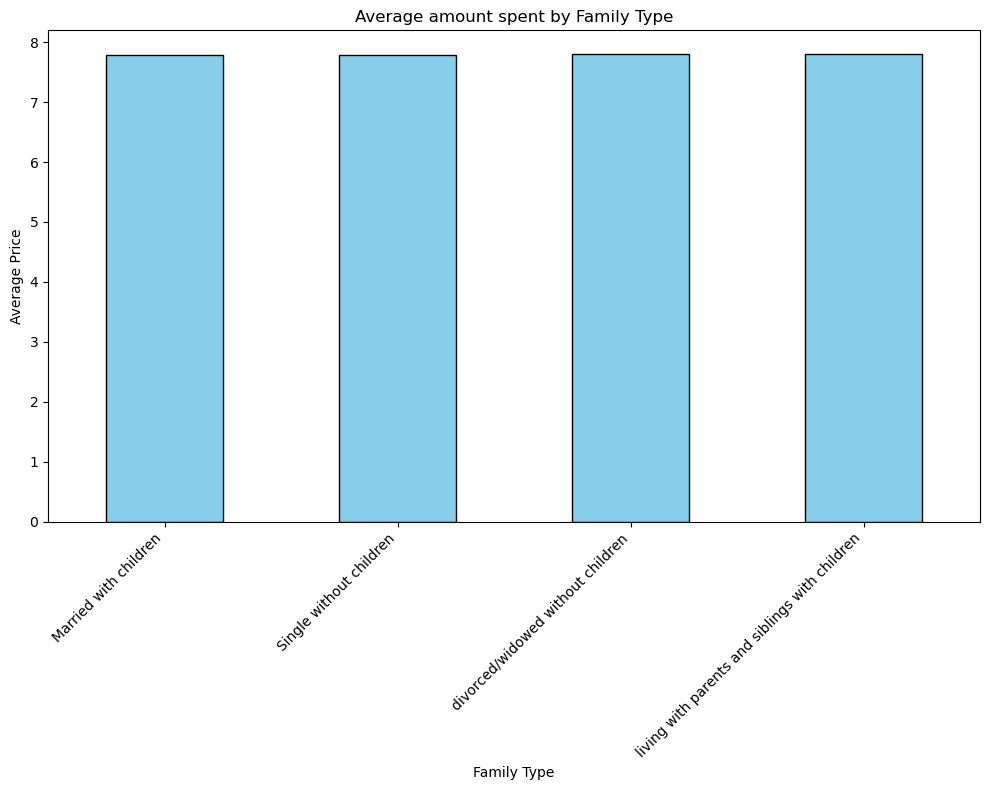

In [150]:
# Group by customer profile and compute the average
fam_type_avg_prices = df_high_act_customer_dept.groupby('family_type')['prices'].mean()

# Plotting
plt.figure(figsize=(10, 8))
fam_type_avg_prices.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average amount spent by Family Type")
plt.ylabel("Average Price")
plt.xlabel("Family Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Export
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'avr_amount_spent_fam_type_bar.png'))

plt.show()

In [79]:
fam_type_avg_prices

family_type
Married with children                             7.790375
Single without children                           7.785786
divorced/widowed without children                 7.804016
living with parents and siblings with children    7.808036
Name: prices, dtype: float64

#### Average amount spent by Income Group

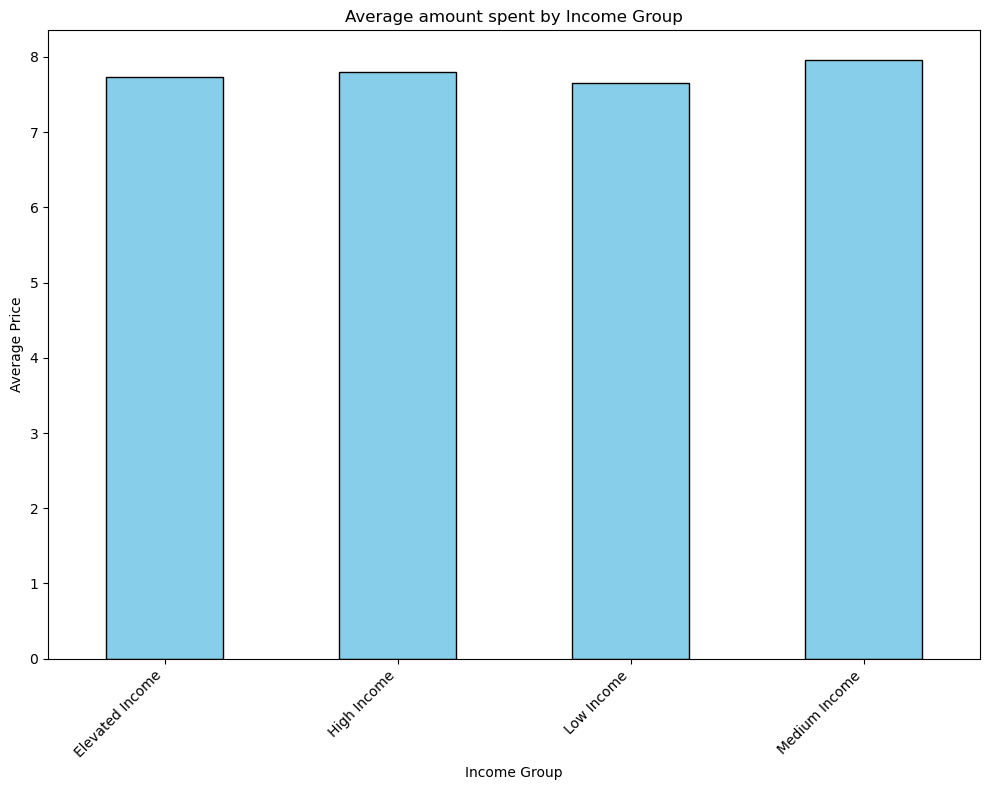

In [151]:
# Group by customer profile and compute the average
income_group_avg_prices = df_high_act_customer_dept.groupby('income_group')['prices'].mean()

# Plotting
plt.figure(figsize=(10, 8))
income_group_avg_prices.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average amount spent by Income Group")
plt.ylabel("Average Price")
plt.xlabel("Income Group")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Export
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'avr_amount_spent_income_group_bar.png'))

plt.show()

In [82]:
income_group_avg_prices

income_group
Elevated Income    7.732943
High Income        7.797796
Low Income         7.654993
Medium Income      7.956014
Name: prices, dtype: float64

#### Average amount spent by Income Group and Family Type

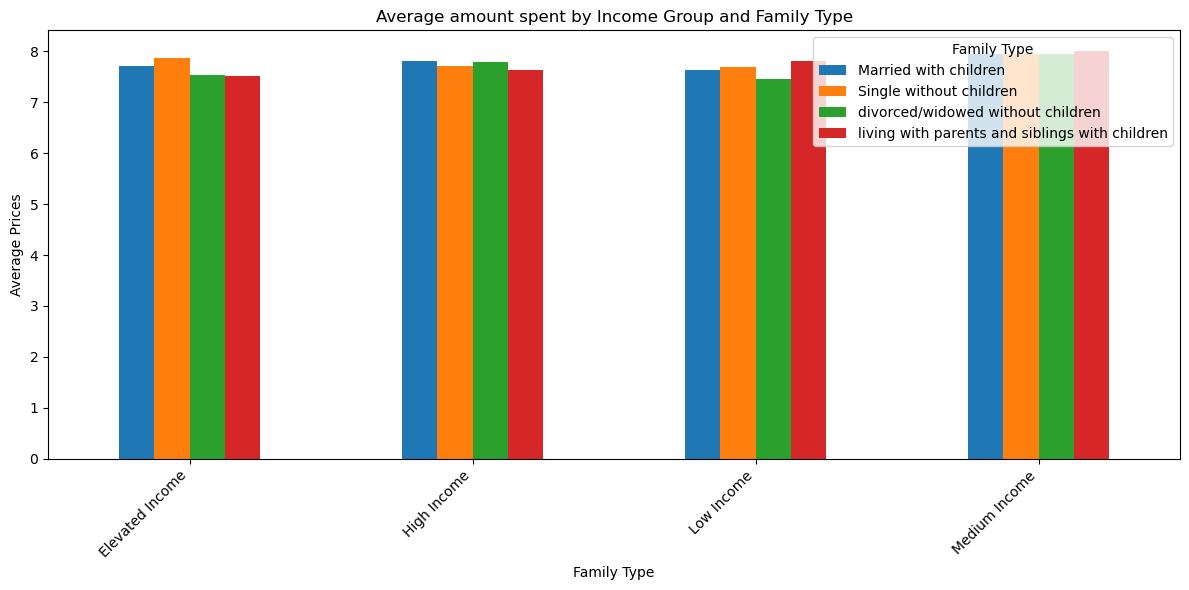

In [152]:
# Create a crosstab between income_group and family_type computing the average order number
avg_spent_crosstab = pd.crosstab(df_high_act_customer_dept['income_group'], 
                                  df_high_act_customer_dept['family_type'], 
                                  values=df_high_act_customer_dept['prices'], 
                                  aggfunc='mean')

# Plotting the results using a bar chart
avg_spent_crosstab.plot(kind='bar', figsize=(12,6))
plt.title("Average amount spent by Income Group and Family Type")
plt.ylabel("Average Prices")
plt.xlabel("Family Type")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Family Type")
plt.tight_layout()

# Export
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'avr_amount_spent_fam_type_income_group_bar.png'))

plt.show()

In [85]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: black; color: white' if v else '' for v in is_max]

styled = avg_spent_crosstab.style.apply(highlight_max, axis=0)
styled

family_type,Married with children,Single without children,divorced/widowed without children,living with parents and siblings with children
income_group,,,,
Elevated Income,7.722411,7.871568,7.531774,7.524522
High Income,7.817688,7.710541,7.791967,7.631301
Low Income,7.635568,7.702145,7.462583,7.802492
Medium Income,7.956454,7.953450,7.954512,8.013072


In [50]:
df_high_act_customer_dept.columns

Index(['order_id', 'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_last_order', 'product_name', 'Age', 'State', 'product_id',
       'n_dependants', 'department_id', 'prices', 'price_range_loc',
       'busiest_day', 'busiest_period_of_day', 'loyalty_flag', 'fam_status',
       'spending_flag', 'order_frequency_flag', 'Gender', 'income', 'Region',
       'age_group', 'income_group', 'department', 'dependants_group',
       'family_type', 'Day', 'Shopper day'],
      dtype='object')

#### Order frequency Time and Day

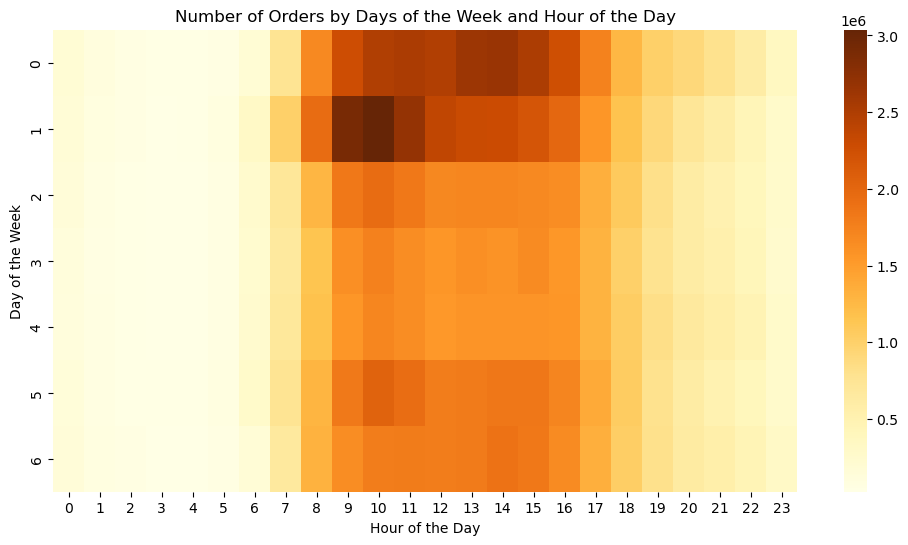

In [153]:
orders_datetime_crosstab = pd.crosstab(df_high_act_customer_dept['orders_day_of_week'], df_high_act_customer_dept['order_hour_of_day'], values=df_high_act_customer_dept['order_number'], aggfunc='sum')

# Display heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(orders_datetime_crosstab, cmap='YlOrBr', annot=False, fmt="d")
plt.title('Number of Orders by Days of the Week and Hour of the Day')
plt.ylabel('Day of the Week')
plt.xlabel('Hour of the Day')

# Export
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'ord_freq_time_&_day_heatmap.png'))

plt.show()

#### Order frequency Time and Day by Family Type

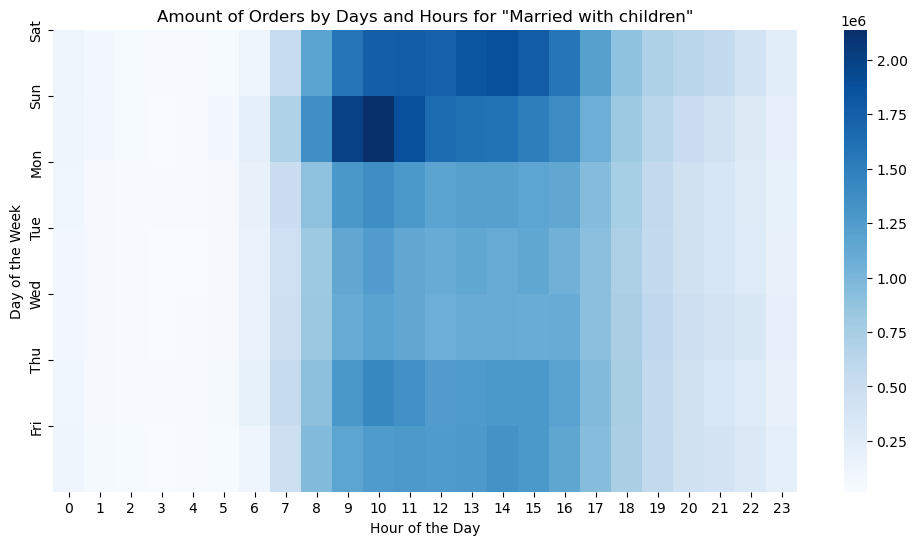

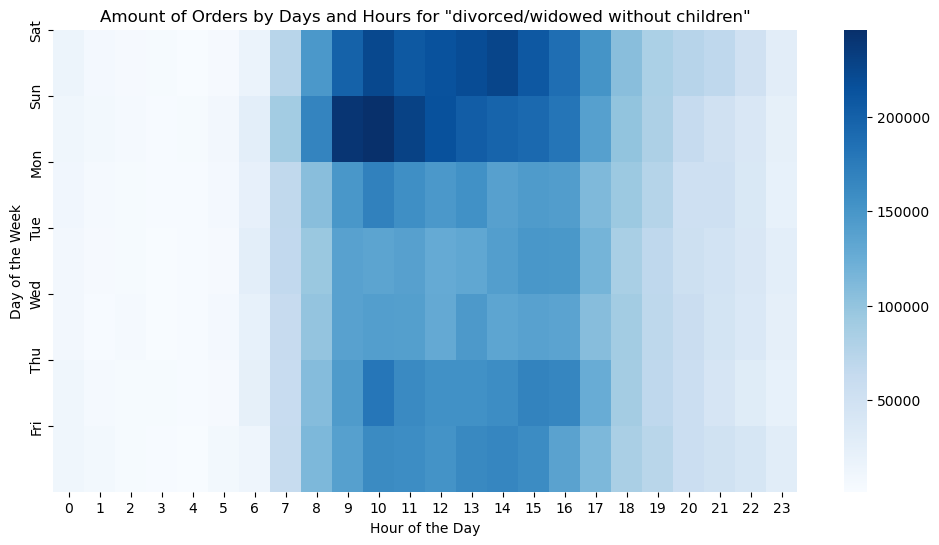

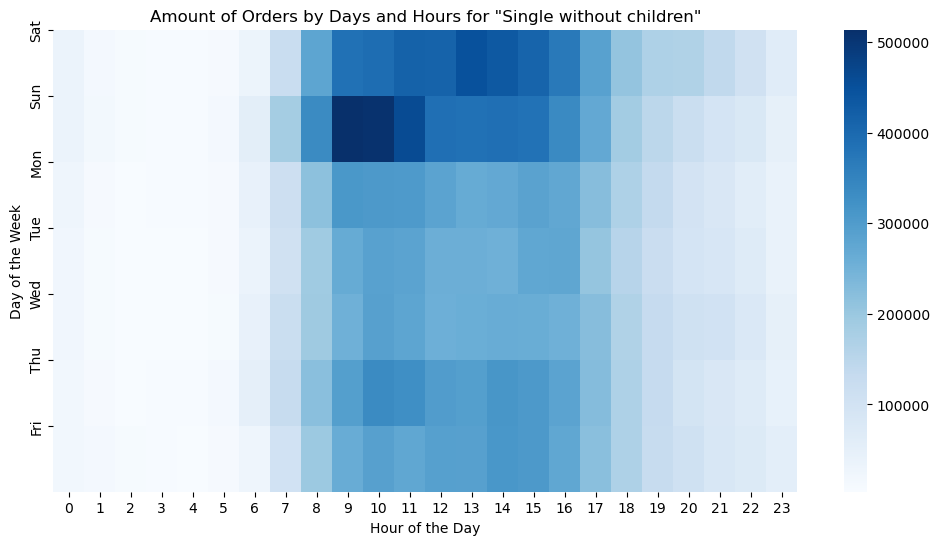

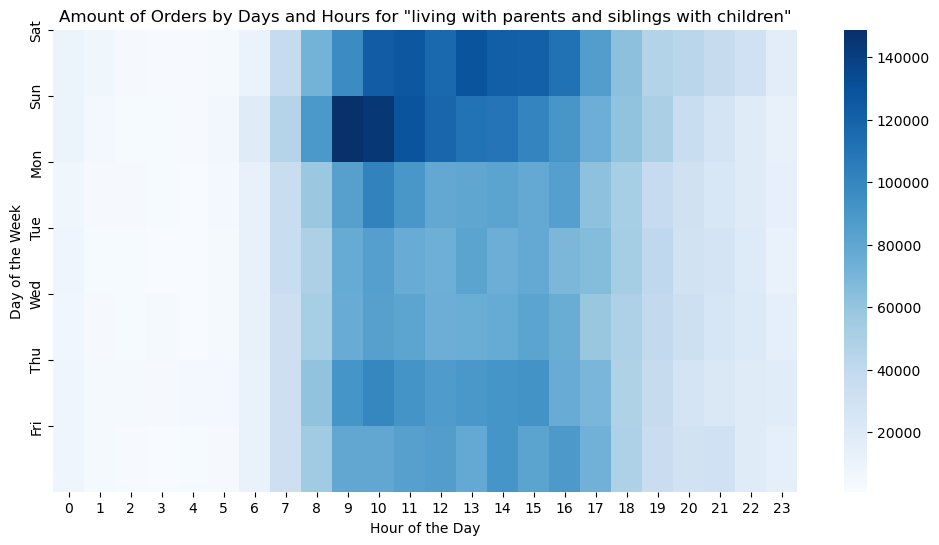

In [160]:
family_groups = df_high_act_customer_dept['family_type'].unique()

for group in family_groups:
    # Filter data for the current family group
    filtered_df = df_high_act_customer_dept[df_high_act_customer_dept['family_type'] == group]
    
    # Create a crosstab for days and hours
    orders_crosstab = pd.crosstab(index=filtered_df['orders_day_of_week'], 
                                  columns=filtered_df['order_hour_of_day'], 
                                  values=filtered_df['order_number'], 
                                  aggfunc='sum')
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(orders_crosstab, cmap='Blues', fmt="d")
    plt.title(f'Amount of Orders by Days and Hours for "{group}"')
    plt.ylabel('Day of the Week')
    plt.xlabel('Hour of the Day')
    plt.yticks(ticks=[0,1,2,3,4,5,6], labels=['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
    
    #Export
    filename = f'ord_freq_time_&_day_heatmap_{group.replace("/", "_")}.png'
    plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', filename))
    
    plt.show()